<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/2D%20DFT/2d_sinusoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

2D sinusoidal gratings

wavelength or frequency

amplitude

orientation

phase

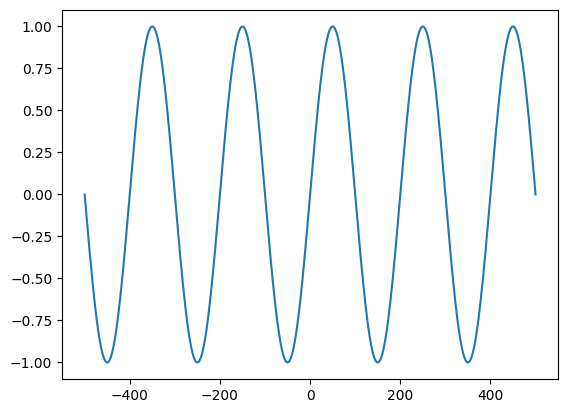

In [1]:
# starting from 1D

# gratings.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
wavelength = 200
y = np.sin(2 * np.pi * x / wavelength)
plt.plot(x, y)
plt.show()

# refer to PUMA video
# k/N in discrete Fourier transform

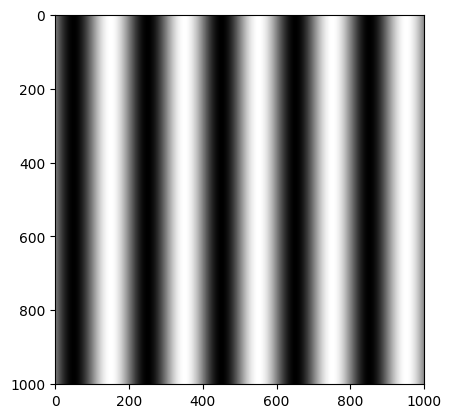

In [6]:
# use meshgrid for 2D

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200
grating1 = np.sin(2 * np.pi * X / wavelength)
plt.set_cmap("gray")
plt.imshow(grating1)
plt.show()

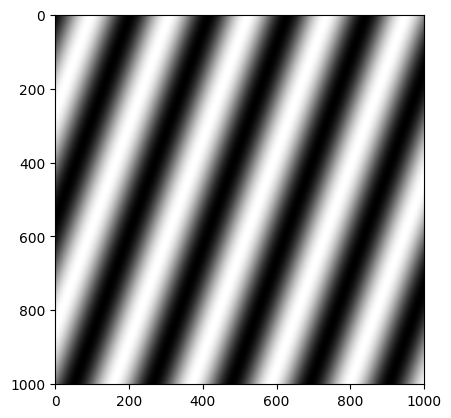

In [7]:
# adding orientation

import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength = 200

angle = np.pi / 9
grating2 = np.sin(
    2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
)
# when angle = 0, sin(angle)=0, no variation in the y-direction

plt.set_cmap("gray")
plt.imshow(grating2)
plt.show()

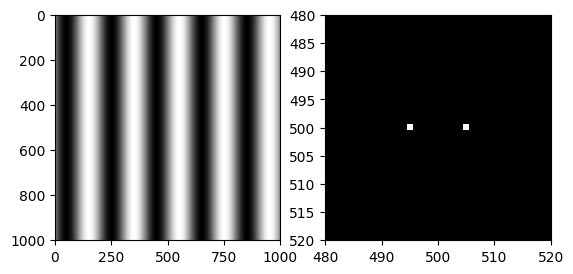

In [8]:
# image frame starting from (0,1)
# frequency domain frame centering at the center of the frame (x/2,y/2)

plt.subplot(121)
plt.imshow(grating1)
ft = np.fft.ifftshift(grating1) #shift the image frame to frequency frame
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)#shfit the frequence frame back to image frame to display
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

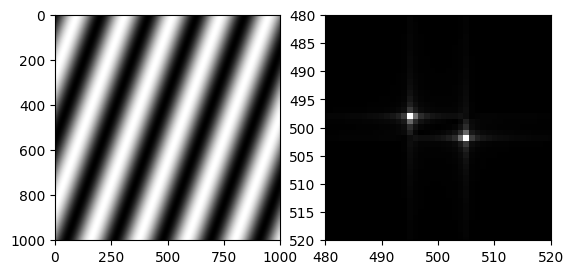

In [9]:
plt.subplot(121)
plt.imshow(grating2)
ft = np.fft.ifftshift(grating2)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

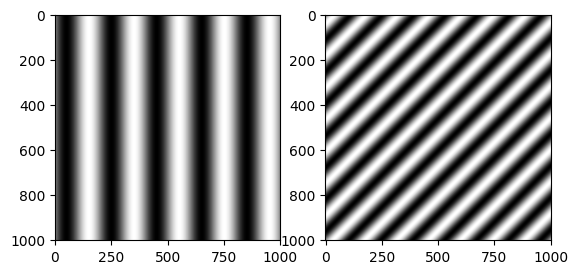

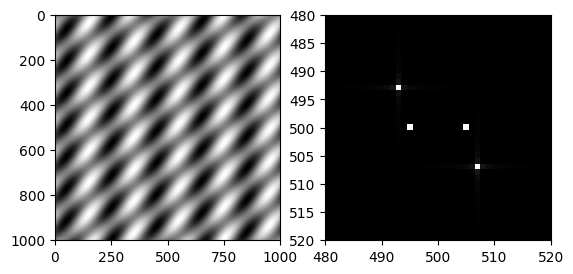

In [10]:
# adding two gratings

# gratings.py
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
wavelength_1 = 200
angle_1 = 0
grating_1 = np.sin(
    2*np.pi*(X*np.cos(angle_1) + Y*np.sin(angle_1)) / wavelength_1
)
wavelength_2 = 100
angle_2 = np.pi/4
grating_2 = np.sin(
    2*np.pi*(X*np.cos(angle_2) + Y*np.sin(angle_2)) / wavelength_2
)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(grating_1)
plt.subplot(122)
plt.imshow(grating_2)
plt.show()
gratings = grating_1 + grating_2
# Calculate Fourier transform of the sum of the two gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.figure()
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

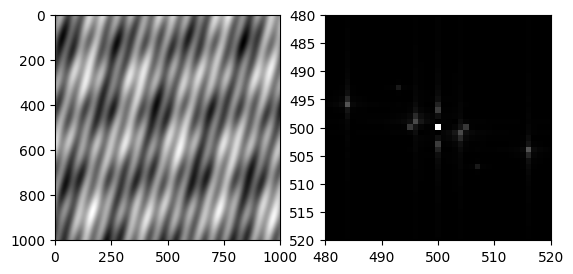

In [11]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)

amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12
gratings = np.zeros(X.shape)

for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len
    )
# Add a constant term to represent the background of image
gratings += 1.25

# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()